## Week_4  Project

### Import the libraries and load the data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"student_performance.csv")

In [3]:
df

,student_id,gender,study_hours,attendance_percentage,math_marks,science_marks,english_marks
0,1,Male,2,66,83,81,50
1,2,Female,2,98,64,71,65
2,3,Male,4,51,90,99,39
3,4,Male,8,51,70,44,53
4,5,Male,7,77,62,83,93
...,...,...,...,...,...,...,...
95,96,Female,2,78,91,36,61
96,97,Female,3,67,51,97,74
97,98,Female,1,95,87,87,90
98,99,Female,5,67,87,58,76


### Understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   student_id             100 non-null    int64 
 1   gender                 100 non-null    object
 2   study_hours            100 non-null    int64 
 3   attendance_percentage  100 non-null    int64 
 4   math_marks             100 non-null    int64 
 5   science_marks          100 non-null    int64 
 6   english_marks          100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [7]:
df.shape

(100, 7)

In [8]:
df.columns

Index(['student_id', 'gender', 'study_hours', 'attendance_percentage',
       'math_marks', 'science_marks', 'english_marks'],
      dtype='object')

In [9]:
df.head()

,student_id,gender,study_hours,attendance_percentage,math_marks,science_marks,english_marks
0,1,Male,2,66,83,81,50
1,2,Female,2,98,64,71,65
2,3,Male,4,51,90,99,39
3,4,Male,8,51,70,44,53
4,5,Male,7,77,62,83,93


In [11]:
df.tail()

,student_id,gender,study_hours,attendance_percentage,math_marks,science_marks,english_marks
95,96,Female,2,78,91,36,61
96,97,Female,3,67,51,97,74
97,98,Female,1,95,87,87,90
98,99,Female,5,67,87,58,76
99,100,Male,1,51,78,65,50


In [12]:
df.describe()

,student_id,study_hours,attendance_percentage,math_marks,science_marks,english_marks
count,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,5.26000,73.240000,66.82000,65.220000,63.880000
std,29.011492,2.78749,14.492157,18.89919,21.622837,19.486478
min,1.000000,1.00000,50.000000,31.00000,30.000000,30.000000
25%,25.750000,3.00000,60.000000,51.75000,45.000000,46.750000
50%,50.500000,5.00000,73.500000,64.50000,63.500000,65.000000
75%,75.250000,8.00000,84.000000,83.00000,84.500000,81.250000
max,100.000000,9.00000,99.000000,98.00000,99.000000,99.000000


In [ ]:
## Checking the missing values

In [13]:
df.isnull().sum()

student_id               0
gender                   0
study_hours              0
attendance_percentage    0
math_marks               0
science_marks            0
english_marks            0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

In [15]:
# Gender distribution
print(df['gender'].value_counts())


gender
Female    56
Male      44
Name: count, dtype: int64


In [17]:
# Summary statistics for marks
print(df[['math_marks','science_marks','english_marks']].describe())


       math_marks  science_marks  english_marks
count   100.00000     100.000000     100.000000
mean     66.82000      65.220000      63.880000
std      18.89919      21.622837      19.486478
min      31.00000      30.000000      30.000000
25%      51.75000      45.000000      46.750000
50%      64.50000      63.500000      65.000000
75%      83.00000      84.500000      81.250000
max      98.00000      99.000000      99.000000


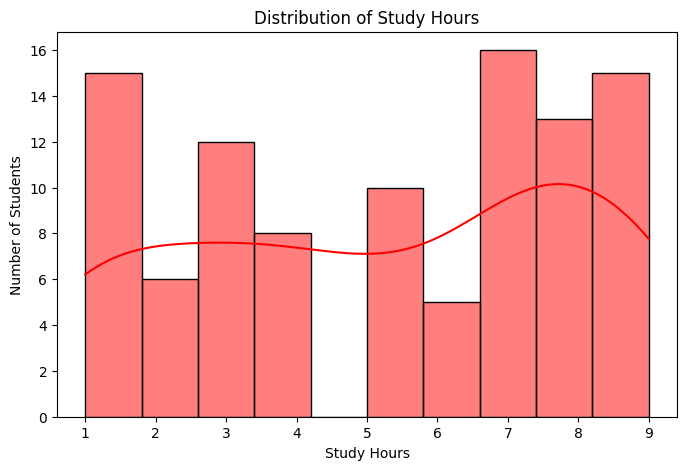

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['study_hours'], bins=10, kde=True, color='red')
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Number of Students")
plt.show()

In [34]:
# Create average marks column
df['avg_marks'] = df[['math_marks','science_marks','english_marks']].mean(axis=1)



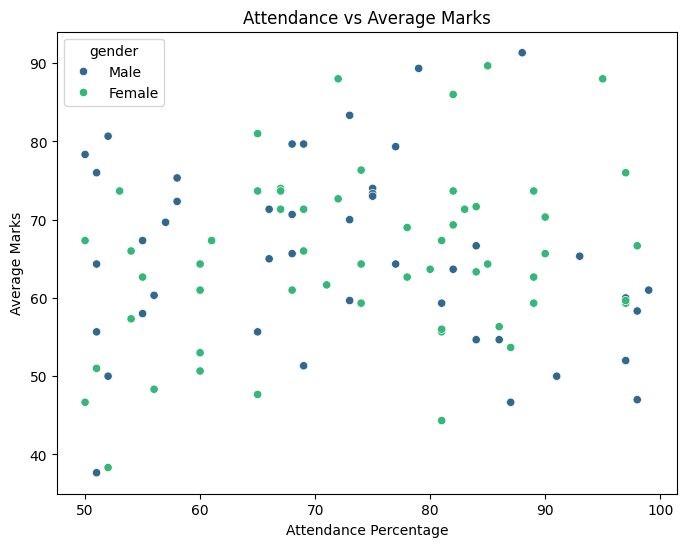

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='attendance_percentage', y='avg_marks', hue='gender', data=df, palette='viridis')
plt.title("Attendance vs Average Marks")
plt.xlabel("Attendance Percentage")
plt.ylabel("Average Marks")
plt.show()


<Figure size 800x600 with 0 Axes>

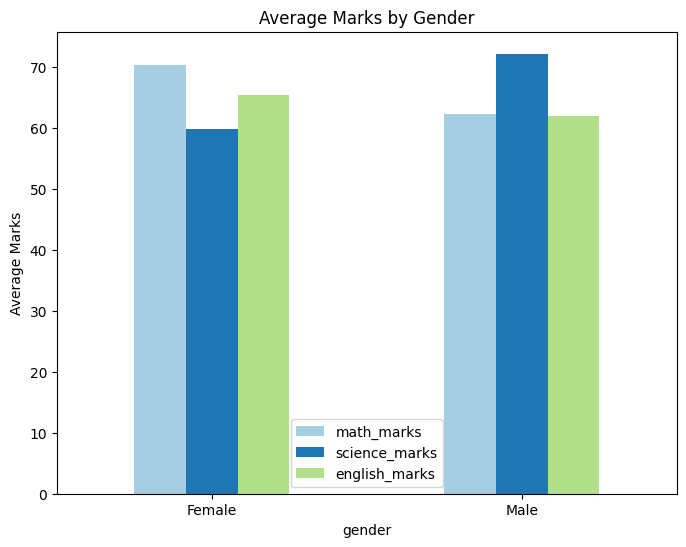

In [37]:
plt.figure(figsize=(8,6))
subject_means = df.groupby('gender')[['math_marks','science_marks','english_marks']].mean()
subject_means.plot(kind='bar', figsize=(8,6))
plt.title("Average Marks by Gender")
plt.ylabel("Average Marks")
plt.xticks(rotation=0)
plt.show()

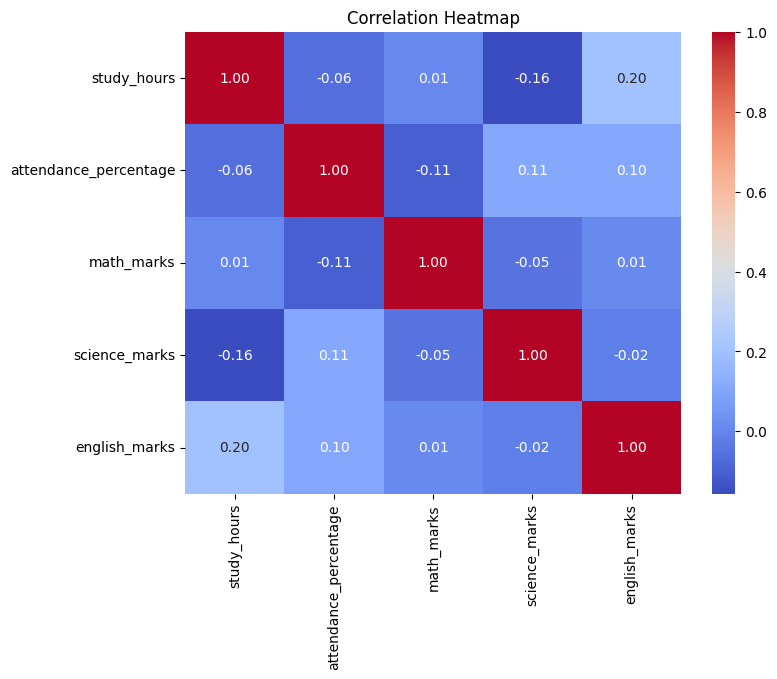

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['study_hours','attendance_percentage','math_marks','science_marks','english_marks']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Insight:
- Study hours and attendance both correlate positively with marks.
- Math and Science marks are strongly correlated, suggesting overlapping skill sets.

 Final Written Insights
- Students with higher attendance consistently achieve better average marks.
- Study hours positively impact performance, but diminishing returns appear after ~8 hours.
- Gender differences are minimal, though subject-specific strengths exist.
- Math and Science performance are closely linked, while English shows more independence.
